# Demonstration of a few image processing functions

In this notebook, we demonstrate how to use a few functions included in the `basictools` package. We show how to import and how to use the function. How the function works internally is not explained, please look at the associated file for this. For all the options associated with the function, execute `help(<function>)`.

The functions demonstrated are:

* **fft2_image (fft2 module)**: for calculating a publication quality FFT from an image
* **bw_filter (image_filters module)**: for applying a Butterworth filter on an image
* **fitLatPeaks (fitLatticePeaks module)**: for calculating atomic column positions in an HR-(S)TEM image

# Importing a few essential modules

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [1]:
%matplotlib notebook

# Importing a sample image

In [3]:
hrtem = Image.open("./examples/1l.tif")

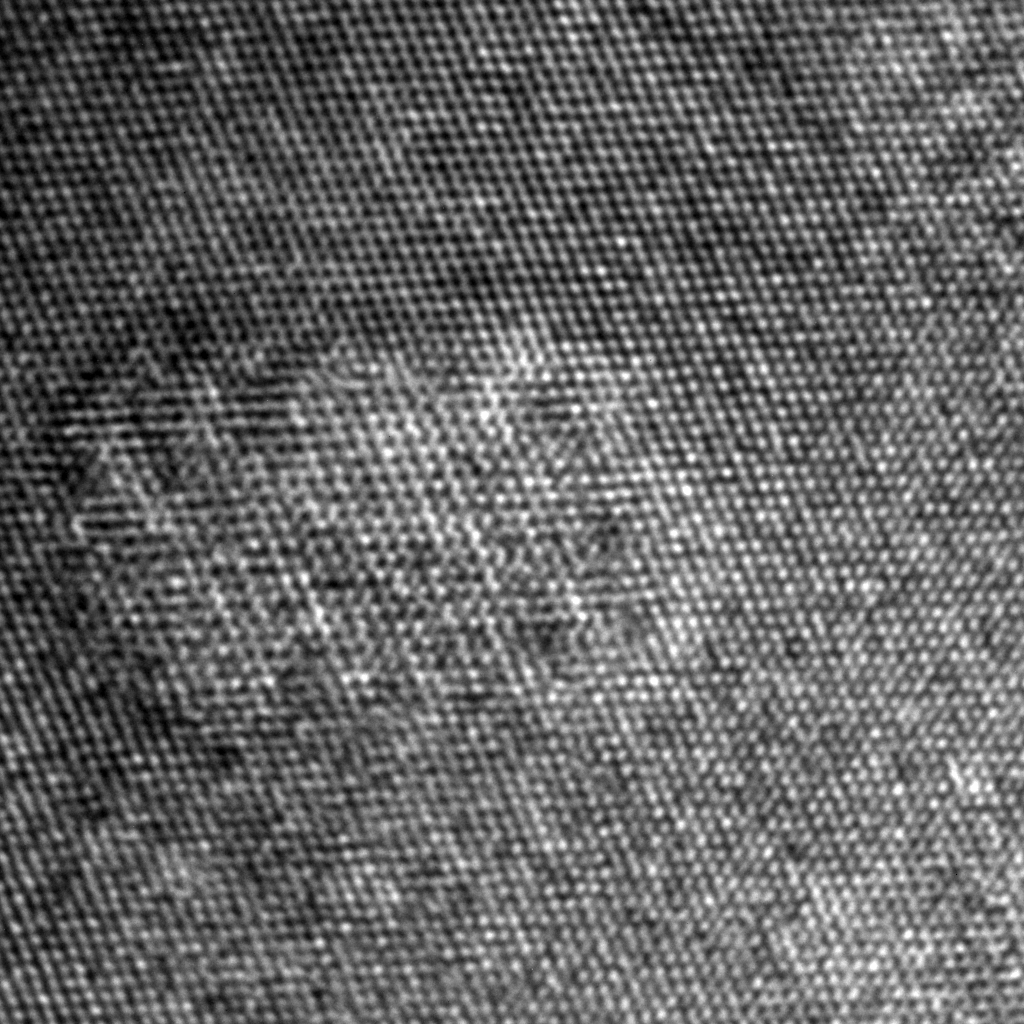

In [4]:
hrtem

# Calculating a nice smoothed FFT

In [6]:
from basictools import fft2

In [7]:
fft_test = fft2.fft2_image(hrtem, k_size=7, sigma=4, cs=20, crop_factor=3)

<IPython.core.display.Javascript object>


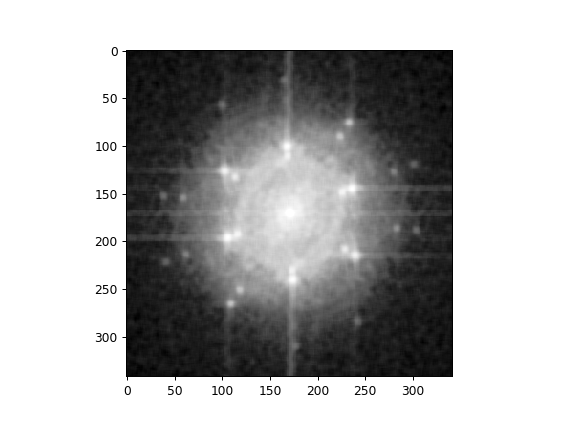

In [10]:
plt.figure()
plt.imshow(fft_test, cmap = "Greys_r")

# Butterworth filter

In [11]:
from basictools import image_filters as imf

In [12]:
im_bw = imf.bw_filter(hrtem, 100, 8)

<IPython.core.display.Javascript object>


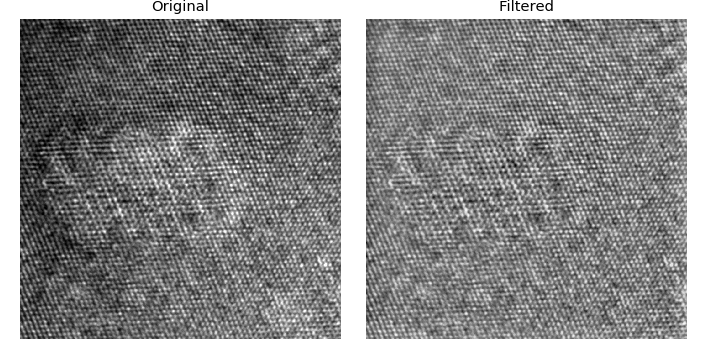

In [13]:
subfigs = [1, 2]
factor = 4

fig, axes = plt.subplots(subfigs[0], subfigs[1], figsize = (subfigs[1]*factor, subfigs[0]*factor))

axes[0].set_title("Original")
axes[0].imshow(hrtem)
axes[1].set_title("Filtered")
axes[1].imshow(im_bw, cmap = "Greys_r")

for i in axes:
    i.axis("off")
    
fig.tight_layout()

## The effect of bw_filter in the fft

<IPython.core.display.Javascript object>


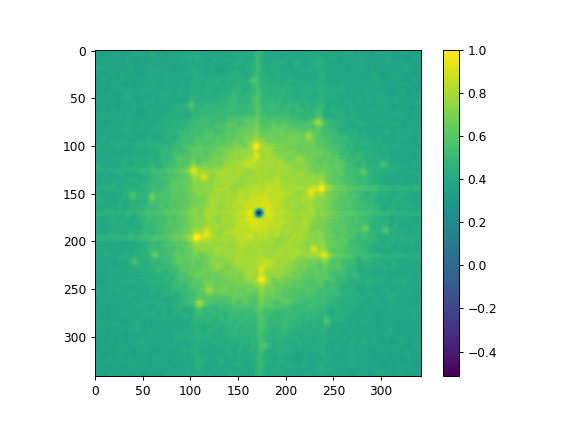

In [16]:
fft_bw = fft2.fft2_image(im_bw)
fig, ax = plt.subplots()
ff = ax.imshow(fft_bw, cmap = "viridis")
fig.colorbar(ff, ax = ax)

# Peak finding

In [18]:
from basictools import fitLatticePeaks as flp

<IPython.core.display.Javascript object>


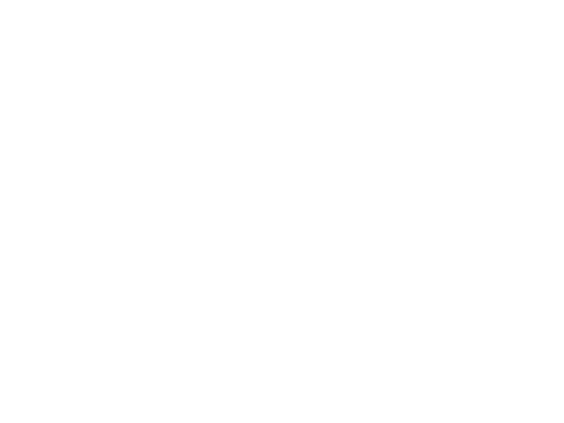

In [22]:
pks = flp.fitLatPeaks(hrtem)

# Plotting the peaks over the original image. Peaks are given by blue dots

In [23]:
from basictools import plotImagePeaks as pipks

<IPython.core.display.Javascript object>


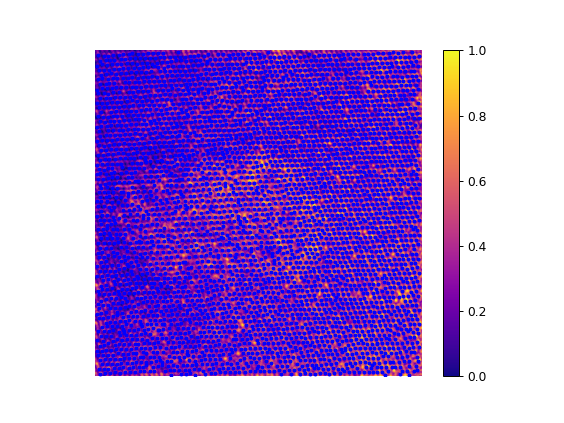

In [24]:
fig, ax = plt.subplots(1)
pipks.plotImagePeaks(hrtem, pks, ax = ax)